# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

hd = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
hd['flag_doente'] = (hd['num']!=0).astype('int64')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [29]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [30]:
hdd = pd.DataFrame(hd['sex'], hd['flag_doente'])
hdd

,sex
flag_doente,
0,1.0
1,1.0
1,1.0
0,1.0
0,1.0
...,...
1,1.0
1,1.0
1,1.0


In [31]:
reglog = smf.logit(" fbs ~ sex + flag_doente + age"
                   , data=hd).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.410808
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    fbs   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                 0.02218
Time:                        00:51:24   Log-Likelihood:                -124.47
converged:                       True   LL-Null:                       -127.30
Covariance Type:            nonrobust   LLR p-value:                    0.1302
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.3532      1.169     -3.723      0.000      -6.645      -2.062
sex             0.4287      0.386      1.110      0.267      -0.328       1.186
flag_doente    -0.1205      0.349     -0.346      0.730      -0.804       0.563
age             0.0425      0.020      2.166      0.030       0.004       0.081
===============================================================================
"""

In [32]:
print('A variavel flag_doente é a que aparenta mais risco')

A variavel flag_doente é a que aparenta mais risco


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [6]:
hdds = pd.DataFrame(hd['age'], hd['flag_doente'])
hdds

,age
flag_doente,
0,63.0
1,67.0
1,67.0
0,63.0
0,63.0
...,...
1,67.0
1,67.0
1,67.0


In [13]:
default = pd.qcut(hd.age, 5)
default.head(6)

0      (62.0, 77.0]
1      (62.0, 77.0]
2      (62.0, 77.0]
3    (28.999, 45.0]
4    (28.999, 45.0]
5      (53.0, 58.0]
Name: age, dtype: category
Categories (5, interval[float64, right]): [(28.999, 45.0] < (45.0, 53.0] < (53.0, 58.0] < (58.0, 62.0] < (62.0, 77.0]]

In [14]:
reglog = smf.logit(" fbs ~ sex + flag_doente + default"
                   , data=hd).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.405296
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    fbs   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                 0.03529
Time:                        11:38:30   Log-Likelihood:                -122.80
converged:                       True   LL-Null:                       -127.30
Covariance Type:            nonrobust   LLR p-value:                    0.1744
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -3.2433      0.657     -4.938      0.000      -4.531      -1.956
default[T.Interval(45.0, 53.0, closed='right')]     1.5375      0.674      2.281      0.023       0.216       2.859
default[T.Interval(53.0, 58.0, closed='right')]     1.4521      0.680      2.134      0.033       0.118       2.786
default[T.Interval(58.0, 62.0, closed='right')]     1.5414      0.729      2.115      0.034       0.113       2.970
default[T.Interval(62.0, 77.0, closed='right')]     1.4697      0.697      2.110      0.035       0.104       2.835
sex                                                 0.3757      0.386      0.975      0.330      -0.380       1.131
flag_doente                                        -0.1276      0.356     -0.358      0.720      -0.826       0.570
===================================================================================================================
"""

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [53]:
reglog = smf.logit(" fbs ~ sex + cp + trestbps + age"
                   , data=hd).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.399593
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    fbs   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                 0.04887
Time:                        16:15:01   Log-Likelihood:                -121.08
converged:                       True   LL-Null:                       -127.30
Covariance Type:            nonrobust   LLR p-value:                   0.01435
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4331      1.629     -3.950      0.000      -9.625      -3.241
sex            0.4469      0.374      1.194      0.233      -0.287       1.181
cp            -0.1066      0.163     -0.652      0.514      -0.427       0.214
trestbps       0.0229      0.009      2.479      0.013       0.005       0.041
age            0.0293      0.020      1.445      0.148      -0.010       0.069
==============================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [57]:
hd['probabilidade'] = reglog.predict(hd)
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito,probabilidade
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.283346,0.283346
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.312792,0.312792
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.154014,0.154014
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.095745,0.095745
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.078082,0.078082


In [58]:
h = pd.qcut(hd['probabilidade'], 5)
h.value_counts().sort_index()

(0.0295, 0.0887]    61
(0.0887, 0.116]     60
(0.116, 0.15]       61
(0.15, 0.197]       60
(0.197, 0.452]      61
Name: probabilidade, dtype: int64

In [59]:
d = hd.groupby(h)
s = d[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
s

,contagem
probabilidade,
"(0.0295, 0.0887]",61
"(0.0887, 0.116]",60
"(0.116, 0.15]",61
"(0.15, 0.197]",60
"(0.197, 0.452]",61


In [61]:
s['probabilidade'] = d['probabilidade'].mean()
s

,contagem,probabilidade
probabilidade,,
"(0.0295, 0.0887]",61,0.069874
"(0.0887, 0.116]",60,0.102284
"(0.116, 0.15]",61,0.134071
"(0.15, 0.197]",60,0.168027
"(0.197, 0.452]",61,0.267880


In [62]:
s['num'] = d['flag_doente'].mean()
s

,contagem,probabilidade,num
probabilidade,,,
"(0.0295, 0.0887]",61,0.069874,0.245902
"(0.0887, 0.116]",60,0.102284,0.416667
"(0.116, 0.15]",61,0.134071,0.491803
"(0.15, 0.197]",60,0.168027,0.533333
"(0.197, 0.452]",61,0.267880,0.606557


Text(0.5, 0, 'Grupo')

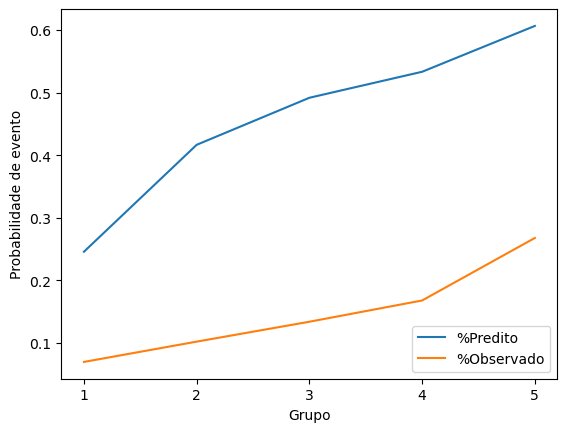

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax = s['num'].plot(label='%Predito')
ax = s['probabilidade'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Text(0, 0.5, 'Função Distribuição Acumulada')

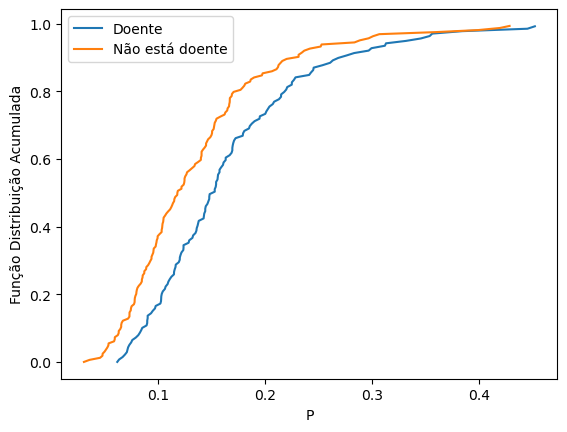

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = hd.loc[hd['flag_doente']==1,'probabilidade']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doente')

score_pop2 = hd.loc[hd['flag_doente']!=1,'probabilidade']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não está doente')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [66]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(hd['flag_doente'], hd['probabilidade']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(hd['flag_doente'], hd['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(hd.loc[hd['flag_doente'] == 1, 'probabilidade'], hd.loc[hd['flag_doente'] != 1, 'probabilidade']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 54.13%
KS: 21.72% 
AUC: 63.89% 
GINI: 27.78%
